In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from pandas import DataFrame
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users\lowji/Desktop/AY2122 S1/DSA3101/Assignment 1/booking_reviews copy.csv")

In [3]:
df.shape

(26386, 15)

In [4]:
df.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [5]:
#Drop redundant columns
df = df.drop(['images','crawled_at','url', 'hotel_url','meta'] , 1)

In [6]:
df.dtypes

review_title        object
reviewed_at         object
reviewed_by         object
hotel_name          object
avg_rating         float64
nationality         object
rating             float64
review_text         object
raw_review_text     object
tags                object
dtype: object

In [7]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

review_title        8683
reviewed_at         1056
reviewed_by         8396
hotel_name           819
nationality          163
review_text        18507
raw_review_text    18536
tags                8121
dtype: int64

In [8]:
# Inspect the numerical variables
df.describe()

,avg_rating,rating
count,26386.000000,26386.000000
mean,8.449242,8.560669
std,0.716427,1.566554
min,3.800000,1.000000
25%,8.100000,7.900000
50%,8.500000,9.000000
75%,8.900000,10.000000
max,10.000000,10.000000


In [9]:
# Check missing value
df.isna().sum()

review_title        1
reviewed_at         0
reviewed_by         0
hotel_name          0
avg_rating          0
nationality        16
rating              0
review_text         0
raw_review_text     0
tags                0
dtype: int64

In [10]:
# Drop NA and duplicates
df = df.dropna().drop_duplicates(keep='first')
df.isna().sum()

review_title       0
reviewed_at        0
reviewed_by        0
hotel_name         0
avg_rating         0
nationality        0
rating             0
review_text        0
raw_review_text    0
tags               0
dtype: int64

In [11]:
# Quarter of the year column
df['reviewed_at'] = pd.to_datetime(df['reviewed_at'])
df['quarter'] = df['reviewed_at'].dt.quarter
df['quarter'] = df['quarter'].astype('category')
df.head()

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,tags,quarter
0,Exceptional,2021-07-11,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,3
1,I highly recommend this b&b! We enjoyed it a lot!,2019-11-24,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,4
2,Exceptional,2020-01-03,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,1
3,My stay in the house was a experiencing bliss ...,2019-09-08,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,3
4,One bedroom apartment with wonderful view and ...,2019-06-23,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,2


In [12]:
# Hotel type column
conditions = [
    (df['hotel_name'].str.contains('hotel', case=False)),
    (df['hotel_name'].str.contains('hostel', case=False)),
    (df['hotel_name'].str.contains('motel', case=False)),
    (df['hotel_name'].str.contains('b&b|bed & breakfast', case=False)),
    (df['hotel_name'].str.contains('guesthouse|guest house', case=False)),
    (df['hotel_name'].str.contains('apartment', case=False)),
    (df['hotel_name'].str.contains('chalet', case=False))
]

values = ['Hotel', 'Hostel', 'Motel','Bed & Breakfast', 'Guest House','Apartment','Chalet']

df['hotel_type'] = np.select(conditions, values, default='Others')

df.drop_duplicates(subset=['hotel_name'], keep='first').value_counts('hotel_type')

hotel_type
Others             426
Hotel              199
Bed & Breakfast    117
Apartment           41
Guest House         16
Hostel              12
Chalet               7
Motel                1
dtype: int64

In [13]:
# Check hotel type column
print(df.groupby('hotel_type').size())

hotel_type
Apartment            744
Bed & Breakfast     2067
Chalet                61
Guest House          387
Hostel              1271
Hotel              12170
Motel                845
Others              8817
dtype: int64


In [14]:
# Nights stayed, room type, traveller type, trip type columns
df['tags'] = df['tags'].replace({'~Submitted via mobile': '', 'With a pet~': ''}, regex=True)
foo = lambda x: pd.Series([i for i in reversed(x.split('~'))])
df[['nights_stayed', 'room_type', 'traveller_type', 'trip_type']] = df['tags'].apply(foo)
df = df.drop(['tags', 'trip_type'], 1)

In [15]:
# Refine nights stayed column
df = df.assign(nights_stayed = lambda x: x['nights_stayed'].str.extract('(\d+)'))
df['nights_stayed'] = pd.to_numeric(df['nights_stayed'])
df.head()

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type
0,Exceptional,2021-07-11,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",3,Others,1,Junior Suite,Solo traveller
1,I highly recommend this b&b! We enjoyed it a lot!,2019-11-24,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",4,Others,1,Deluxe Suite,Couple
2,Exceptional,2020-01-03,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Apartment,6,Apartment with Sea View,Couple
3,My stay in the house was a experiencing bliss ...,2019-09-08,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",3,Others,4,Junior Suite,Solo traveller
4,One bedroom apartment with wonderful view and ...,2019-06-23,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",2,Apartment,4,Apartment with Sea View,People with friends


In [16]:
#Rename columns
df.rename(columns={'reviewed_at' : 'review_date', 'reviewed_by': 'reviewer', 'avg_rating':'hotel_avg_rating'}, inplace = True)
df.head()

,review_title,review_date,reviewer,hotel_name,hotel_avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type
0,Exceptional,2021-07-11,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",3,Others,1,Junior Suite,Solo traveller
1,I highly recommend this b&b! We enjoyed it a lot!,2019-11-24,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",4,Others,1,Deluxe Suite,Couple
2,Exceptional,2020-01-03,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Apartment,6,Apartment with Sea View,Couple
3,My stay in the house was a experiencing bliss ...,2019-09-08,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",3,Others,4,Junior Suite,Solo traveller
4,One bedroom apartment with wonderful view and ...,2019-06-23,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",2,Apartment,4,Apartment with Sea View,People with friends


In [17]:
# Remove carriage returns
df["review_text"] = df["review_text"].replace(r'\r', ' ', regex=True)

In [18]:
# Dataframe 2 with 20 hotels (at least 4 star hotel, top 10 of lowest and highest ratings by reviewers)
hotels = ['Hotel Le Châtelain', 'Radisson Blu Hotel, Bruges', 'Van der Valk Hotel Antwerpen', 'Holiday Inn Hasselt, an IHG Hotel', 'Theater Hotel', 'Hotel Dolce La Hulpe Brussels', 'Renaissance Brussels Hotel', 'Hotel Bourgoensch Hof','Mercure Hotel Brussels Centre Midi', "Marivaux Hotel","Hotel Bütgenbacher Hof","Rocco Forte Hotel Amigo", "Grand Hotel Belle Vue", "Hotel Royal", "Pillows Grand Boutique Hotel Place Rouppe Brussels", "ABC Hotel", "Hotel De Castillion - Small elegant family hotel", "Hotel B - Boskapelhoeve", "ManavaHotel", "Aparthotel Trilogie"]
df2 = df.loc[df['hotel_name'].isin(hotels)]
df2.shape

(1980, 14)

In [19]:
hotel_prices = {}

In [20]:
hotel_royal = df2.loc[df['hotel_name'] == "Hotel Royal"]
hotel_royal_room_types = list(hotel_royal['room_type'].unique())
hotel_royal_prices = [180, 220, 220, 250, 180, 200, 160]
hotel_prices.update({"Hotel Royal": [hotel_royal_room_types, hotel_royal_prices]})

In [21]:
hotel_bütgenbacher_hof = df2.loc[df['hotel_name'] == "Hotel Bütgenbacher Hof"]
hotel_bütgenbacher_hof_room_types = list(hotel_bütgenbacher_hof['room_type'].unique())
hotel_bütgenbacher_hof_prices = [243, 153, 276, 336, 236]
hotel_prices.update({"Hotel Bütgenbacher Hof": [hotel_bütgenbacher_hof_room_types, hotel_bütgenbacher_hof_prices]})

In [22]:
rocco = df2.loc[df['hotel_name'] == "Rocco Forte Hotel Amigo"]
rocco_room_types = list(rocco['room_type'].unique())
rocco_prices = [265, 319, 517, 1008, 644]
hotel_prices.update({"Rocco Forte Hotel Amigo": [rocco_room_types, rocco_prices]})

In [23]:
grand = df2.loc[df['hotel_name'] == "Grand Hotel Belle Vue"]
grand_room_types = list(grand['room_type'].unique())
grand_prices = [258, 188, 258, 278]
hotel_prices.update({"Grand Hotel Belle Vue": [grand_room_types, grand_prices]})

In [24]:
pillows = df2.loc[df['hotel_name'] == "Pillows Grand Boutique Hotel Place Rouppe Brussels"]
pillows_room_types = list(pillows['room_type'].unique())
pillows_prices = [140, 170]
hotel_prices.update({"Pillows Grand Boutique Hotel Place Rouppe Brussels": [pillows_room_types, pillows_prices]})

In [25]:
abc_hotel = df2.loc[df['hotel_name'] == "ABC Hotel"]
abc_hotel_room_types = list(abc_hotel['room_type'].unique())
abc_hotel_prices = [224, 199, 199, 245, 244]
hotel_prices.update({"ABC Hotel": [abc_hotel_room_types, abc_hotel_prices]})

In [26]:
castillion = df2.loc[df['hotel_name'] == "Hotel De Castillion - Small elegant family hotel"]
castillion_room_types = list(castillion['room_type'].unique())
castillion_prices = [384, 168, 217, 287, 238, 319, 211]
hotel_prices.update({"Hotel De Castillion - Small elegant family hotel": [castillion_room_types, castillion_prices]})

In [27]:
boskapelhoeve = df2.loc[df['hotel_name'] == "Hotel B - Boskapelhoeve"]
boskapelhoeve_room_types = list(boskapelhoeve['room_type'].unique())
boskapelhoeve_prices = [280, 230, 190, 150, 190]
hotel_prices.update({"Hotel B - Boskapelhoeve": [boskapelhoeve_room_types, boskapelhoeve_prices]})

In [28]:
manava = df2.loc[df['hotel_name'] == "ManavaHotel"]
manava_room_types = list(manava['room_type'].unique())
manava_prices = [116, 112, 100, 110]
hotel_prices.update({"ManavaHotel": [manava_room_types, manava_prices]})

In [29]:
trilogie = df2.loc[df['hotel_name'] == "Aparthotel Trilogie"]
trilogie_room_types = list(trilogie['room_type'].unique())
trilogie_prices = [175, 125, 250, 200, 220, 240]
hotel_prices.update({"Aparthotel Trilogie": [trilogie_room_types, trilogie_prices]})

In [30]:
dolce = df2.loc[df['hotel_name'] == "Hotel Dolce La Hulpe Brussels"]
dolce_room_types = list(dolce['room_type'].unique())
dolce_prices = [131,159,147,159,212]
hotel_prices.update({"Hotel Dolce La Hulpe Brussels": [dolce_room_types, dolce_prices]})

In [31]:
renaissance = df2.loc[df['hotel_name'] == "Renaissance Brussels Hotel"]
renaissance_room_types = list(renaissance['room_type'].unique())
renaissance_prices = [138, 143, 113, 178, 178, 250, 240]
hotel_prices.update({"Renaissance Brussels Hotel": [renaissance_room_types, renaissance_prices]})

In [32]:
bourgoensch_hof = df2.loc[df['hotel_name'] == "Hotel Bourgoensch Hof"]
bourgoensch_hof_room_types = list(bourgoensch_hof['room_type'].unique())
bourgoensch_hof_prices = [153, 143, 145, 183, 240]
hotel_prices.update({"Hotel Bourgoensch Hof": [bourgoensch_hof_room_types, bourgoensch_hof_prices]})

In [33]:
marivaux = df2.loc[df['hotel_name'] == "Marivaux Hotel"]
marivaux_room_types = list(marivaux['room_type'].unique())
marivaux_prices = [99, 84, 119, 139]
hotel_prices.update({"Marivaux Hotel": [marivaux_room_types, marivaux_prices]})

In [34]:
mercure = df2.loc[df['hotel_name'] == "Mercure Hotel Brussels Centre Midi"]
mercure_room_types = list(mercure['room_type'].unique())
mercure_prices = [108, 148, 108]
hotel_prices.update({"Mercure Hotel Brussels Centre Midi": [mercure_room_types, mercure_prices]})

In [35]:
le_chatelain = df2.loc[df['hotel_name'] == "Hotel Le Châtelain"]
le_chatelain_room_types = list(le_chatelain['room_type'].unique())
le_chatelain_prices = [158, 188, 228, 458]
hotel_prices.update({"Hotel Le Châtelain": [le_chatelain_room_types, le_chatelain_prices]})

In [36]:
radisson_blu = df2.loc[df['hotel_name'] == "Radisson Blu Hotel, Bruges"]
radisson_blu_room_types = list(radisson_blu['room_type'].unique())
radisson_blu_prices = [210, 170, 190, 145, 285]
hotel_prices.update({"Radisson Blu Hotel, Bruges": [radisson_blu_room_types, radisson_blu_prices]})

In [37]:
vandervalk = df2.loc[df['hotel_name'] == "Van der Valk Hotel Antwerpen"]
vandervalk_room_types = list(vandervalk['room_type'].unique())
vandervalk_prices = [118, 128, 178, 108, 118, 118, 128, 330]
hotel_prices.update({"Van der Valk Hotel Antwerpen": [vandervalk_room_types, vandervalk_prices]})

In [38]:
hasselt = df2.loc[df['hotel_name'] == "Holiday Inn Hasselt, an IHG Hotel"]
hasselt_room_types = list(hasselt['room_type'].unique())
hasselt_prices = [200, 140, 245, 210, 240, 220, 200, 210, 210, 200]
hotel_prices.update({"Holiday Inn Hasselt, an IHG Hotel": [hasselt_room_types, hasselt_prices]})

In [39]:
theater = df2.loc[df['hotel_name'] == "Theater Hotel"]
theater_room_types = list(theater['room_type'].unique())
theater_prices = [132, 132, 115, 115]
hotel_prices.update({"Theater Hotel": [theater_room_types, theater_prices]})

In [40]:
print(hotel_prices)

{'Hotel Royal': [['Privilege Double Room', 'Junior Suite', 'Two-Bedroom Apartment', 'Family Room (2 Adults + 2 Children)', 'Premier Double Room', 'Superior Room', 'Special Offer - Classic Double Room'], [180, 220, 220, 250, 180, 200, 160]], 'Hotel Bütgenbacher Hof': [['Double Room - Annex', 'Single Room', 'Double Room', 'Suite', 'Budget Double Room'], [243, 153, 276, 336, 236]], 'Rocco Forte Hotel Amigo': [['Classic Double Room', 'Deluxe Double Room', 'Executive Double Room', 'Classic Suite', 'Junior Suite'], [265, 319, 517, 1008, 644]], 'Grand Hotel Belle Vue': [['Luxe Tower Suite', 'Superior Deluxe Room', 'Classic Suite (2 Adults)', 'Quadruple Room (2 Adults + 2 Children)'], [258, 188, 258, 278]], 'Pillows Grand Boutique Hotel Place Rouppe Brussels': [['Luxury Room', 'Grand Luxury Room'], [140, 170]], 'ABC Hotel': [['Deluxe Room', 'Deluxe Double Room', 'Deluxe Double or Twin Room', 'Deluxe Family Room', 'Suite with Terrace'], [224, 199, 199, 245, 244]], 'Hotel De Castillion - Small e

In [41]:
# Price per night function
def price_per_night(df):
    for k, v in hotel_prices.items():
        for i in range(len(v[0])):
            if df['hotel_name'] ==  k and df['room_type'] == v[0][i]:
                return v[1][i]

In [42]:
# Price per night column
pd.options.mode.chained_assignment = None  # default='warn'
df2['price_per_night'] = df2.apply (lambda df: price_per_night(df), axis=1)
df2.head()

,review_title,review_date,reviewer,hotel_name,hotel_avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type,price_per_night
32,Exceptional,2020-03-14,Vivian,Marivaux Hotel,8.5,Singapore,10.0,Staff ap friendly and Helpful. Thank you,"<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,2,Standard Double or Twin Room,Couple,99
42,Very good,2020-03-12,Duncan,Marivaux Hotel,8.5,United Kingdom,8.0,Windows opened onto a deep light-well so littl...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,2,Standard Double or Twin Room,Solo traveller,99
56,Typical Conference Hotel close to Brussels Noo...,2020-03-11,Simon,Marivaux Hotel,8.5,Germany,8.0,breakfast did not provide a lot of selection a...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Standard Single Room,Solo traveller,84
70,Close to metro station,2020-03-11,Gergő,Marivaux Hotel,8.5,Hungary,9.0,"none,\n\nRoom, location, breakfast - everythin...","<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Deluxe Double Room,Solo traveller,119
84,Fabulous,2020-03-09,Oleg,Marivaux Hotel,8.5,Germany,8.8,"Unique style, and secret parking made my day","<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,1,Standard Double or Twin Room,People with friends,99


In [43]:
# Total spending column
df2["total_spending"] = df2["price_per_night"].astype(int) * df2["nights_stayed"].astype(int)
df2.head()

,review_title,review_date,reviewer,hotel_name,hotel_avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type,price_per_night,total_spending
32,Exceptional,2020-03-14,Vivian,Marivaux Hotel,8.5,Singapore,10.0,Staff ap friendly and Helpful. Thank you,"<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,2,Standard Double or Twin Room,Couple,99,198
42,Very good,2020-03-12,Duncan,Marivaux Hotel,8.5,United Kingdom,8.0,Windows opened onto a deep light-well so littl...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,2,Standard Double or Twin Room,Solo traveller,99,198
56,Typical Conference Hotel close to Brussels Noo...,2020-03-11,Simon,Marivaux Hotel,8.5,Germany,8.0,breakfast did not provide a lot of selection a...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Standard Single Room,Solo traveller,84,84
70,Close to metro station,2020-03-11,Gergő,Marivaux Hotel,8.5,Hungary,9.0,"none,\n\nRoom, location, breakfast - everythin...","<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Deluxe Double Room,Solo traveller,119,119
84,Fabulous,2020-03-09,Oleg,Marivaux Hotel,8.5,Germany,8.8,"Unique style, and secret parking made my day","<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,1,Standard Double or Twin Room,People with friends,99,99


In [44]:
# Booking frequency column
temp = df2.groupby(['reviewer', 'nationality'], as_index=False).size().sort_values('size', ascending=False)
temp = temp.loc[temp['reviewer'] != 'Anonymous']

df2 = pd.merge(df2, temp, on=['reviewer', 'nationality'], how='left')
df2[['size']] = df2[['size']].fillna(value=1)  #reviewers who are 'Anonymous'
df2.rename(columns={'size': 'booking_freq'}, inplace = True)

df2.head()

,review_title,review_date,reviewer,hotel_name,hotel_avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type,price_per_night,total_spending,booking_freq
0,Exceptional,2020-03-14,Vivian,Marivaux Hotel,8.5,Singapore,10.0,Staff ap friendly and Helpful. Thank you,"<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,2,Standard Double or Twin Room,Couple,99,198,1.0
1,Very good,2020-03-12,Duncan,Marivaux Hotel,8.5,United Kingdom,8.0,Windows opened onto a deep light-well so littl...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,2,Standard Double or Twin Room,Solo traveller,99,198,1.0
2,Typical Conference Hotel close to Brussels Noo...,2020-03-11,Simon,Marivaux Hotel,8.5,Germany,8.0,breakfast did not provide a lot of selection a...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Standard Single Room,Solo traveller,84,84,1.0
3,Close to metro station,2020-03-11,Gergő,Marivaux Hotel,8.5,Hungary,9.0,"none,\n\nRoom, location, breakfast - everythin...","<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Deluxe Double Room,Solo traveller,119,119,1.0
4,Fabulous,2020-03-09,Oleg,Marivaux Hotel,8.5,Germany,8.8,"Unique style, and secret parking made my day","<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,1,Standard Double or Twin Room,People with friends,99,99,1.0


In [45]:
df2.shape

(1980, 17)

In [46]:
df2.dtypes

review_title                object
review_date         datetime64[ns]
reviewer                    object
hotel_name                  object
hotel_avg_rating           float64
nationality                 object
rating                     float64
review_text                 object
raw_review_text             object
quarter                   category
hotel_type                  object
nights_stayed                int64
room_type                   object
traveller_type              object
price_per_night              int64
total_spending               int32
booking_freq               float64
dtype: object

In [47]:
df2.describe()

,hotel_avg_rating,rating,nights_stayed,price_per_night,total_spending,booking_freq
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.00000
mean,8.592980,8.677879,1.892929,156.174242,296.438889,1.49596
std,0.393461,1.482277,1.185925,62.524032,237.237301,1.45628
min,7.800000,1.000000,1.000000,84.000000,84.000000,1.00000
25%,8.400000,8.000000,1.000000,108.000000,143.000000,1.00000
50%,8.500000,9.000000,2.000000,143.000000,222.000000,1.00000
75%,8.900000,10.000000,2.000000,178.500000,356.000000,1.00000
max,9.500000,10.000000,16.000000,1008.000000,3024.000000,11.00000


In [48]:
# Correlation matrix of numerical variables
corrs = df2.corr()
corrs

,hotel_avg_rating,rating,nights_stayed,price_per_night,total_spending,booking_freq
hotel_avg_rating,1.000000,0.304380,-0.016664,0.541151,0.252142,0.076012
rating,0.304380,1.000000,-0.024689,0.168426,0.075006,0.058012
nights_stayed,-0.016664,-0.024689,1.000000,0.010958,0.802198,0.016427
price_per_night,0.541151,0.168426,0.010958,1.000000,0.530241,0.094809
total_spending,0.252142,0.075006,0.802198,0.530241,1.000000,0.070894
booking_freq,0.076012,0.058012,0.016427,0.094809,0.070894,1.000000


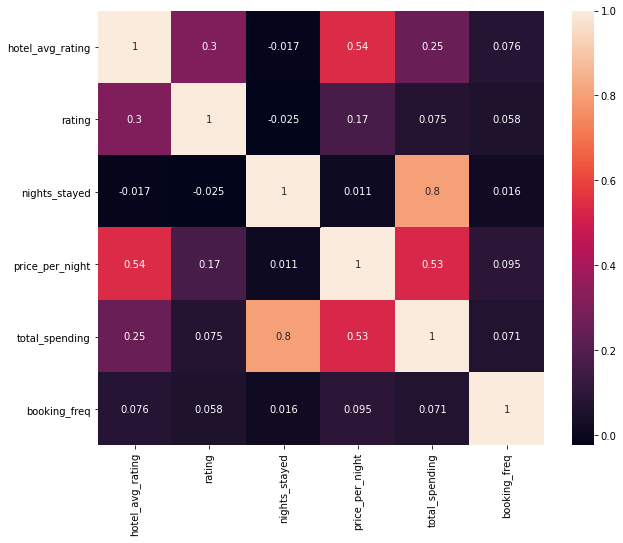

In [49]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corrs, annot=True)
plt.savefig('heatmap.png', bbox_inches="tight")
plt.show()

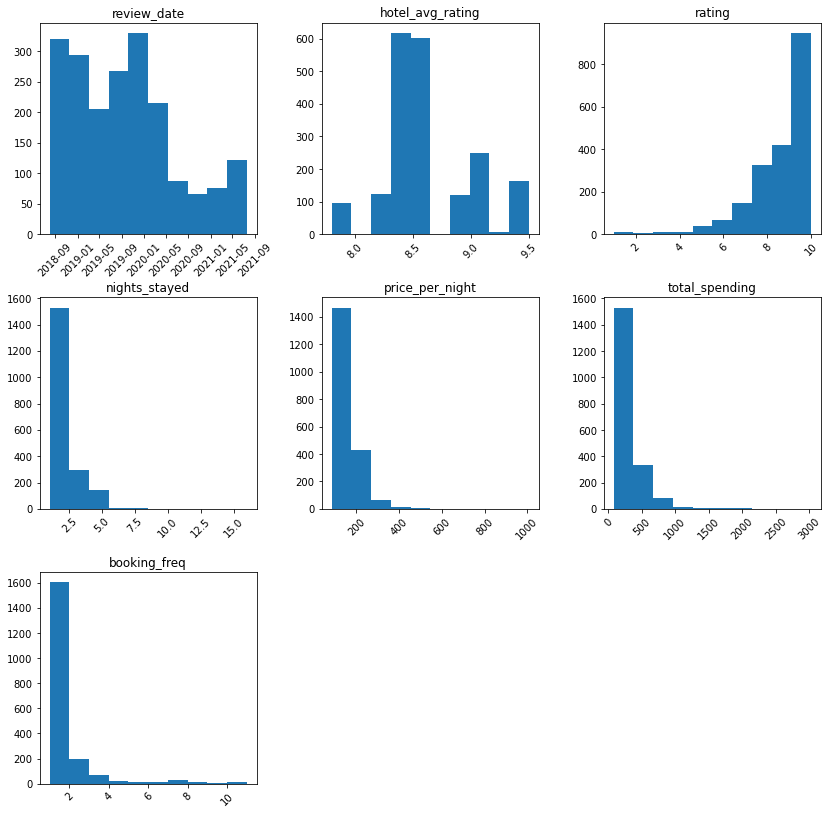

In [50]:
# Histogram of numerical variables
df2.hist(grid = False, figsize=(14,14), xrot=45)
plt.savefig('histogram.png', bbox_inches="tight")
plt.show()

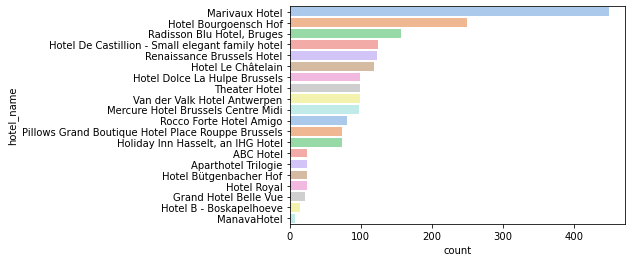

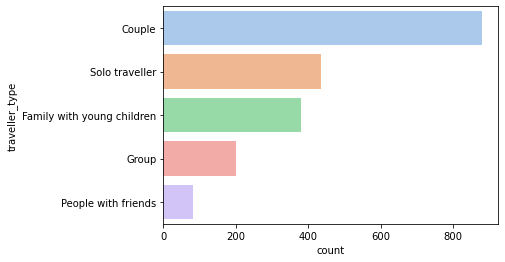

In [57]:
# Plots of categorical variables with 20 and fewer unnique classes
for column in df2.drop('hotel_type', 1).select_dtypes(include='object'):
    if df2[column].nunique() <= 20:
        sns.countplot(y=column, palette = 'pastel', data=df2, order = df2[column].value_counts().index )
        plt.savefig('hotelname.png', bbox_inches="tight")
        plt.show()

In [52]:
#Avg Price Per Night for each hotel column (for percuptual map)
df2['avg_price_per_night'] = df2['hotel_name'].map(df2.groupby(['hotel_name'])['price_per_night'].agg(lambda x: x.unique().mean()))
df2.head()

,review_title,review_date,reviewer,hotel_name,hotel_avg_rating,nationality,rating,review_text,raw_review_text,quarter,hotel_type,nights_stayed,room_type,traveller_type,price_per_night,total_spending,booking_freq,avg_price_per_night
0,Exceptional,2020-03-14,Vivian,Marivaux Hotel,8.5,Singapore,10.0,Staff ap friendly and Helpful. Thank you,"<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,2,Standard Double or Twin Room,Couple,99,198,1.0,110.25
1,Very good,2020-03-12,Duncan,Marivaux Hotel,8.5,United Kingdom,8.0,Windows opened onto a deep light-well so littl...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,2,Standard Double or Twin Room,Solo traveller,99,198,1.0,110.25
2,Typical Conference Hotel close to Brussels Noo...,2020-03-11,Simon,Marivaux Hotel,8.5,Germany,8.0,breakfast did not provide a lot of selection a...,"<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Standard Single Room,Solo traveller,84,84,1.0,110.25
3,Close to metro station,2020-03-11,Gergő,Marivaux Hotel,8.5,Hungary,9.0,"none,\n\nRoom, location, breakfast - everythin...","<p class=""review_neg ""><svg aria-label=""Negati...",1,Hotel,1,Deluxe Double Room,Solo traveller,119,119,1.0,110.25
4,Fabulous,2020-03-09,Oleg,Marivaux Hotel,8.5,Germany,8.8,"Unique style, and secret parking made my day","<p class=""review_pos ""><svg aria-label=""Positi...",1,Hotel,1,Standard Double or Twin Room,People with friends,99,99,1.0,110.25


In [53]:
temp = df2[['hotel_name', 'avg_price_per_night', 'hotel_avg_rating']]
temp.drop_duplicates()

,hotel_name,avg_price_per_night,hotel_avg_rating
0,Marivaux Hotel,110.250000,8.5
128,Hotel Bourgoensch Hof,172.800000,8.4
309,Hotel Royal,202.000000,9.0
449,ManavaHotel,109.500000,9.2
452,Hotel Dolce La Hulpe Brussels,162.250000,8.4
536,Pillows Grand Boutique Hotel Place Rouppe Brus...,155.000000,9.0
876,Grand Hotel Belle Vue,241.333333,9.0
923,Hotel De Castillion - Small elegant family hotel,260.571429,9.5
997,Mercure Hotel Brussels Centre Midi,128.000000,7.8
1100,ABC Hotel,228.000000,9.5


In [54]:
# Determine axis for perceptual map
temp['hotel_avg_rating'].mean()

8.592979797979666

In [55]:
# Determine axis for perceptual map
temp['avg_price_per_night'].mean()

185.534145021643

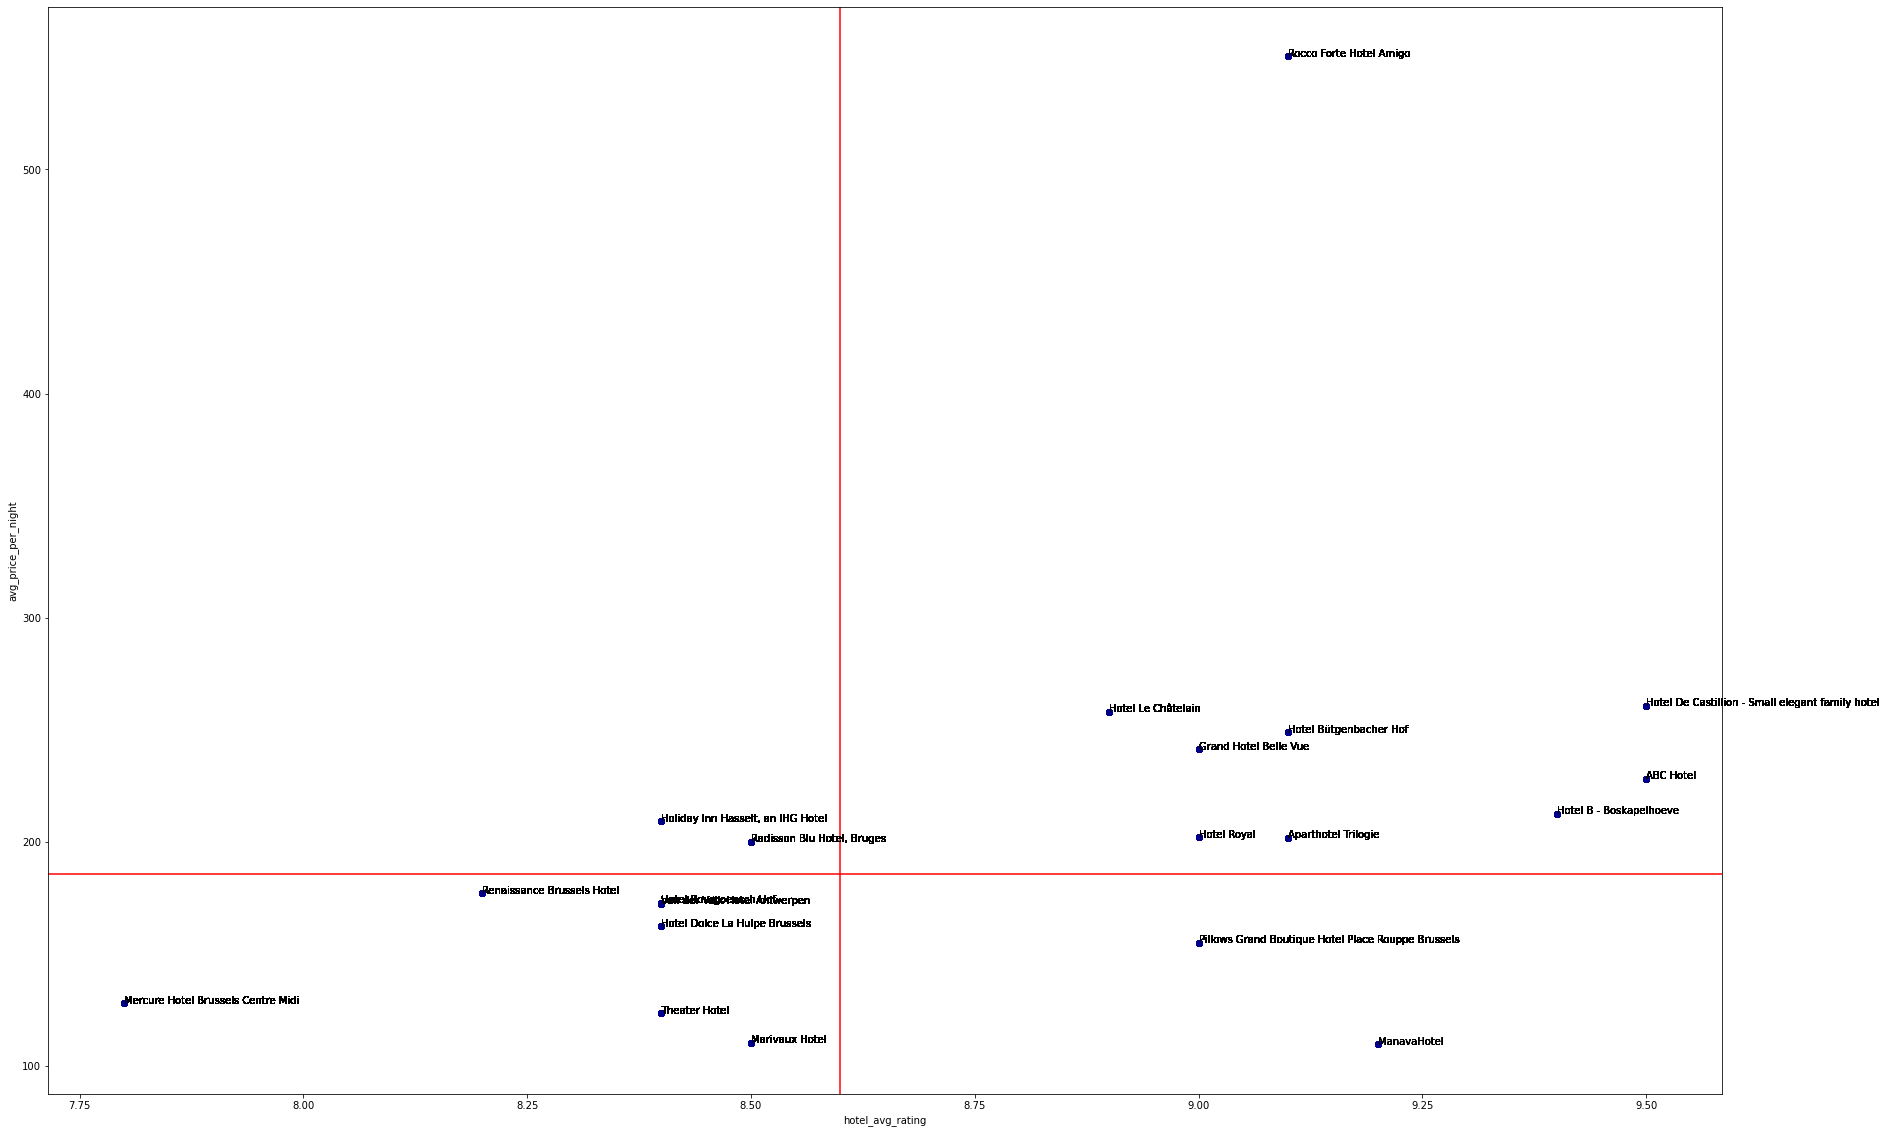

In [59]:
# Plot perceptual map
fig, ax = plt.subplots()
# plot
ax.scatter(x=temp['hotel_avg_rating'],y=temp['avg_price_per_night'],c='DarkBlue')
# set labels
ax.set_xlabel('hotel_avg_rating')
ax.set_ylabel('avg_price_per_night')
# annotate points in axis
for idx, row in temp.iterrows():
    ax.annotate(row['hotel_name'], (row['hotel_avg_rating'], row['avg_price_per_night']) )
# force matplotlib to draw the graph
plt.axhline(y=185.5, color='r', linestyle='-')
plt.axvline(x=8.6, color='r', linestyle='-')
plt.rcParams['figure.figsize'] = 30,20
plt.show()